# Data Project

In [1]:
import pandas as pd
nutrition_df = pd.read_csv("nutrition.csv", index_col="Date")
gym_df = pd.read_csv("gym_checkin.csv", index_col="Date")

I begin by importing pandas, the library I will be using to load, clean, and compute the data. I read in both my meal by meal nutrition data from May through August aswell as a file showing which days in the same time frame I checked in to my local gym.

### Clean The Data

In [2]:
gb = nutrition_df.groupby("Date")
df = pd.DataFrame()
for key, item in gb:
    #place_key = ("0" + key)
    ser = pd.Series()
    ser["Date"] = key
    ser["Calories"] = gb.get_group(key)["Calories"].sum()
    ser["Protein"] = gb.get_group(key)["Protein (g)"].sum()
    ser["Carbohydrates"] = gb.get_group(key)["Carbohydrates (g)"].sum()
    ser["Fat"] = gb.get_group(key)["Fat (g)"].sum()
    ser["Sugar"] = gb.get_group(key)["Sugar"].sum()
    #ser["Gym"] =  gym_df.loc[place_key]['Gym']
    df = df.append(ser, ignore_index=True)
#print(df)    

<ipython-input-2-800c4602edb8>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series()


The data came with meal by meal data and had lots of columns I am uninterested in expiramenting on. I cleaned up the data by summing my macronutrients into one day and only using the attributes I will find useful to make inferences.

In [3]:
df = df.join(gym_df, on='Date', how="left", rsuffix=' Check in')
df.to_csv("cleaned_merge_data.csv")
print(df)

    Calories  Carbohydrates       Date    Fat  Protein  Sugar  Gym
0     2971.3          263.9  5/12/2021  129.3    204.1  164.0  NaN
1     2340.5          269.1  5/19/2021   89.5    131.4   72.2  NaN
2     1300.0          108.0  5/20/2021   44.0     76.0   24.0  NaN
3     3510.0          319.0  5/22/2021  140.0    268.5   76.0  NaN
4     2427.0          223.5  5/23/2021   91.3    185.5   45.0  NaN
..       ...            ...        ...    ...      ...    ...  ...
64    2556.7          240.0  8/18/2021   87.8    205.0   91.0  NaN
65    2485.0          252.5  8/19/2021   86.0    165.0   96.0  NaN
66    2417.0          246.1   8/2/2021   65.4    215.6   43.5  NaN
67    2474.0          136.9   8/3/2021  115.6    204.9   12.8  NaN
68    1540.0          112.0   8/5/2021   69.0     96.8   73.8  NaN

[69 rows x 7 columns]


### Visualize Data

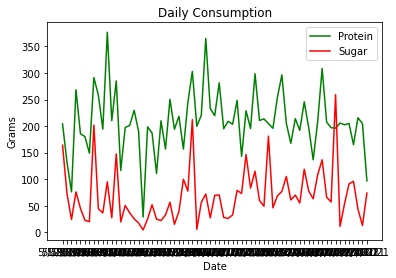

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df['Date'], df['Protein'], color='green', label='Protein')
plt.plot(df['Date'], df['Sugar'], color='red', label='Sugar')
plt.xlabel("Date")
plt.ylabel("Grams")
plt.title("Daily Consumption")
plt.legend()

([<matplotlib.patches.Wedge at 0x23bc13c9460>,
 [Text(0.2547483625568853, 1.0700949825948096, 'Carbs'),
  Text(-1.0944777367822627, -0.11008398470248079, 'Fat'),
  Text(0.36056071319017763, -1.039228546617052, 'Protein')],
 [Text(0.13895365230375561, 0.5836881723244416, '42.6%'),
  Text(-0.5969878564266887, -0.06004580983771679, '18.1%'),
  Text(0.19666947992191505, -0.566851934518392, '39.4%')])

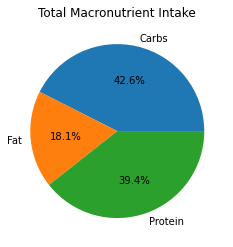

In [5]:
protein = df["Protein"].sum()
carbs = df["Carbohydrates"].sum()
fat = df["Fat"].sum()
labels = ["Carbs", "Fat", "Protein"]
plt.figure()
plt.title("Total Macronutrient Intake")
plt.pie([carbs, fat, protein], labels=labels, autopct='%1.1f%%')

In [6]:
merge_df = pd.read_csv("clean_merge_data.csv", index_col="Date")
nonPro = []
gymPro = []
nonSug = []
gymSug = []
for instance in merge_df.values:
    if (instance[6] == 'No'):
        nonPro.append(instance[4])
        nonSug.append(instance[5])
    if (instance[6] == 'Yes'):
        gymPro.append(instance[4])
        gymSug.append(instance[5])
        
gb = (merge_df.groupby('Gym').mean())
#gather off and on day means
noProMean = gb['Protein'][0]
gymProMean = gb['Protein'][1]
noSugMean = gb["Sugar"][0]
gymSugMean = gb["Sugar"][1]
print("N/G Protein Mean:", noProMean, gymProMean)
print("N/G Sugar Mean:", noSugMean, gymSugMean)

N/G Protein Mean: 208.16666666666666 208.66470588235293
N/G Sugar Mean: 66.83888888888889 68.73529411764707


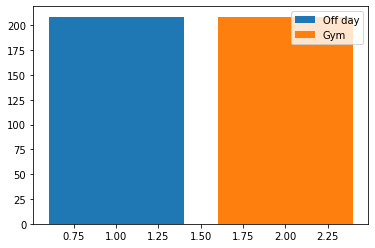

In [19]:
plt.figure()
plt.bar(1, noProMean, label="Off day")
plt.bar(2, gymProMean, label="Gym")
plt.legend()

### Hypothesis Testing

Hypothesis: I ate more Protein on days I went to the gym than on days I did not.
1. State Hypothesis
* $H_{0}: \mu_{g} <= \mu_{n}$
* $H_{1}: \mu_{g} > \mu_{n}$
1. Level of significance
* $\alpha = 0.01$
1. Select Test Statistic
* $t= \frac{\bar{x_{1}}-\bar{x_{2}}}{\sqrt{sp^{2}(\frac{1}{n_{1}}+\frac{1}{n_{2}})}}$  
1. Decision Rule
* Looking up a one tailed test for level of significance of 0.01 and df=60 we find a t-critical of 2.390
* If t-computed is > 2.390 we reject $H_{0}$
* If t-computed is <= 2.390 we do not reject $H_{0}$

In [7]:
import scipy.stats as stats
t, p = stats.ttest_ind(gymPro, nonPro, equal_var=False)
print("T-computed:", t, "P/2:",p/2)

T-computed: 0.028761960042039757 P/2: 0.4886341505086117


Step 5: Make a decision  
The T computed (0.028) is less than T-critical (2.390) thus we do not reject $H_{0}$. So I can conclude I do not eat a significant ammout more protein on days I work out.

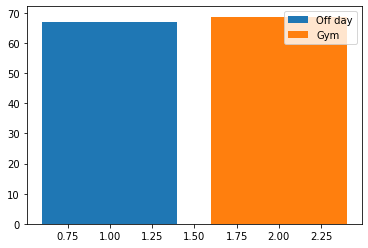

In [20]:
plt.figure()
plt.bar(1, noSugMean, label="Off day")
plt.bar(2, gymSugMean, label="Gym")
plt.legend()

### Test 2

Hypothesis: I ate more Sugar on days I went to the gym than on days I did not.
1. State Hypothesis
* $H_{0}: \mu_{g} <= \mu_{n}$
* $H_{1}: \mu_{g} > \mu_{n}$
1. Level of significance
* $\alpha = 0.01$
1. Select Test Statistic
* $t= \frac{\bar{x_{1}}-\bar{x_{2}}}{\sqrt{sp^{2}(\frac{1}{n_{1}}+\frac{1}{n_{2}})}}$  
1. Decision Rule
* Looking up a one tailed test for level of significance of 0.01 and df=60 we find a t-critical of 2.390
* If t-computed is > 2.390 we reject $H_{0}$
* If t-computed is <= 2.390 we do not reject $H_{0}$

In [8]:
t, p = stats.ttest_ind(gymSug, nonSug, equal_var=False)
print("T-computed:", t, "P/2:",p/2)

T-computed: 0.12079594347113232 P/2: 0.45240596657519844


Step 5: Make a decision  
The T computed (0.12) is less than T-critical (2.390) thus we do not reject $H_{0}$. So I can conclude I do not eat a significant ammout more sugar on days I work out.